## IPL(2008-2018) datast analysis

The Indian Premier League (IPL) is a professional Twenty-20 Cricket tournament held annually in India. It is organized by the Board of Control for Cricket in India (BCCI), which was established in 2008. The IPL consists of various teams that are formed through the auctioning of cricket players. The tournament begins with semi-final matches and culminates in a final match, with the winning team being crowned champions. The first season of the IPL took place on April 18, 2008.

About dataset </br>
Obtained from kaggle
consist of the data of season from 2008 to 2018.


    data          | size
    -----------------------------
    deliveries.csv|(164750, 21)
    matches.csv   |(696, 18)

#### We are going to do analysis on these points
* The number of games played in a particular season
* The number of games held at a specific location
* The number of games played by each team
* The number of victories for each team
* The team that won the championship for each season
* The top performers of each match
* The leading umpires
* The success rate of teams that win the coin toss
* Analysis of batsmen's performance
* The number of times a batsman hits a six
* The batsman who has played the most number of balls without scoring runs
* The most common ways that batsmen are dismissed in the Indian Premier League.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [78]:
# read the input files and look at the top few lines #
match_df = pd.read_csv("matches.csv")
score_df = pd.read_csv("deliveries.csv")
match_df['team1'] = match_df['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
match_df['team2'] = match_df['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants') 
match_df['winner'] = match_df['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
score_df['batting_team'] = score_df['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
score_df['bowling_team'] = score_df['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

match_df.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [76]:
score_df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
164745,7953,2,Chennai Super Kings,Sunrisers Hyderabad,18,5,SR Watson,AT Rayudu,S Kaul,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
164746,7953,2,Chennai Super Kings,Sunrisers Hyderabad,18,6,SR Watson,AT Rayudu,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164747,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,1,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164748,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,2,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164749,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,3,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [3]:
# getting the size of the data and the basic stats of the data #
print("Number of matches played so far : ", match_df.shape[0])
print("Number of seasons : ", len(match_df.season.unique()))

Number of matches played so far :  696
Number of seasons :  11


### Number of matches each season:

we have the data of the seasons of ipl from 2008 to 2018, Now we are plotting the number of matches played in each of the seasons.

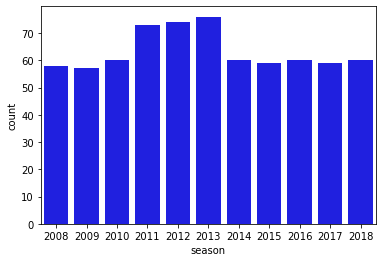

In [20]:
sns.countplot(x='season', data=match_df,color ='Blue')
plt.show()

from the above bar graph we found that in the 2011,2012,2013 number of matches played around 70.
the following graphs shows the venue of the each of the matches.
### Number of matches in each venue

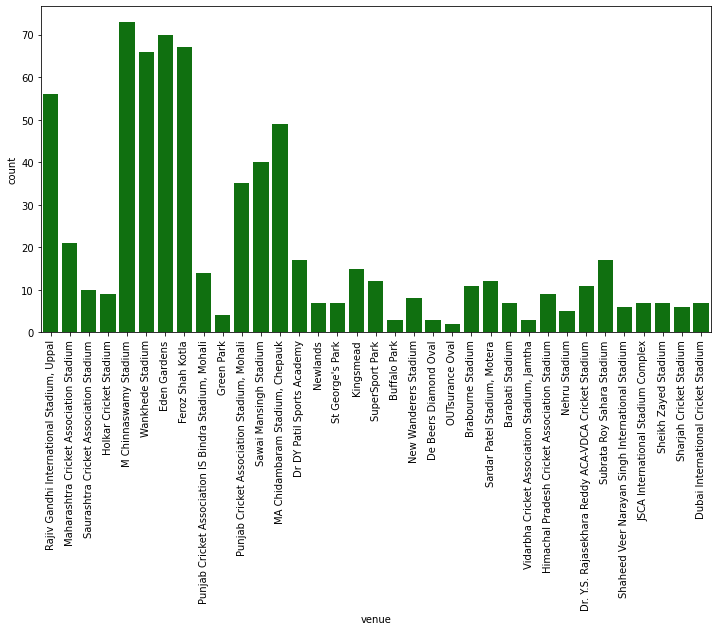

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=match_df,color ='green')
plt.xticks(rotation='vertical')
plt.show()

There are quite a few venues present in the data with "M Chinnaswamy Stadium" being the one with most number of matches followed by "Eden Gardens".

### Number of matches played by each team

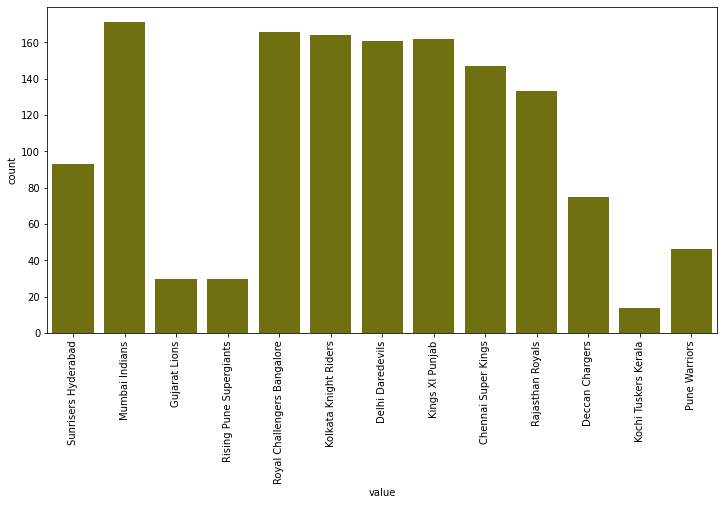

In [22]:
temp_df = pd.melt(match_df, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df, color = 'olive')
plt.xticks(rotation='vertical')
plt.show()

"Mumbai Indians" lead the pack with most number of matches played followed by "Royal Challengers Bangalore". </br>
Gujarat Lions and the Rising Super giants were the two new teams introduced in the IPL.

### Number of wins per team

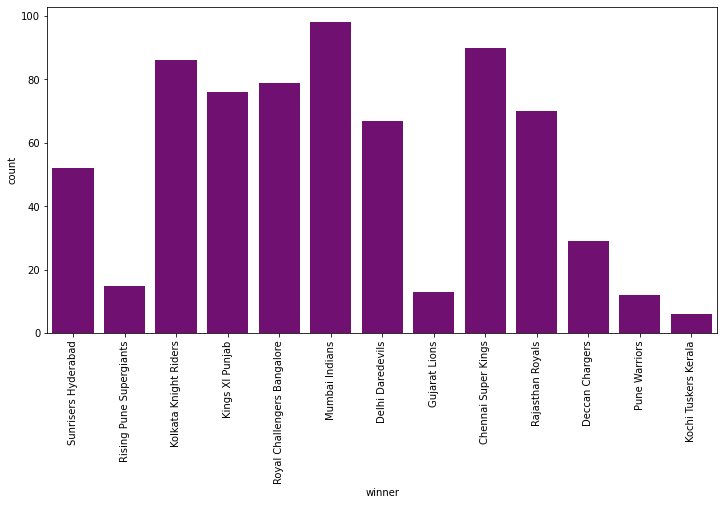

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=match_df, color ='purple')
plt.xticks(rotation='vertical')
plt.show()

From above data MI wins more matches followed by CSK and KKR.

### Winner of each season


In [24]:
temp_df = match_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


### Toss 


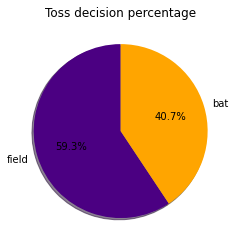

In [25]:
temp_series = match_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['indigo', 'orange']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()
          

Almost 55% of the toss decisions are made to field first. Now let us see how this decision varied over time.

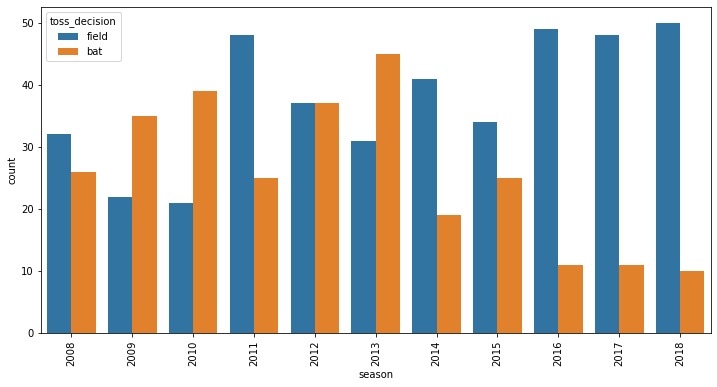

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=match_df)
plt.xticks(rotation='vertical')
plt.show()


Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.

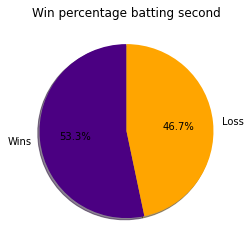

In [26]:
num_of_wins = (match_df.win_by_wickets>0).sum()
num_of_loss = (match_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['indigo', 'orange']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

So percentage of times teams batting second has won is 53.2. Now let us split this by year and see the distribution.

C:\Users\Anand\AppData\Local\Temp\ipykernel_8552\3581180584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df["field_win"].loc[match_df['win_by_wickets']==0] = "loss"


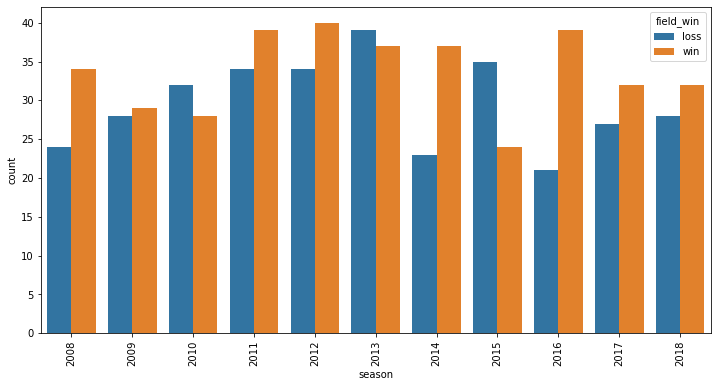

In [33]:
match_df["field_win"] = "win"
match_df["field_win"].loc[match_df['win_by_wickets']==0] = "loss"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

From above graph if we see then number of wins, when batting second is quite high 

### Top players of the match

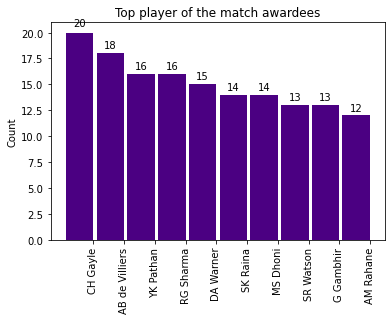

In [38]:
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')
        

temp_series = match_df.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='indigo')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

CH Gayle, AB de VIlliers, YK Pathan, RG sharma are among the top player ot the match awardees.

### Top Umpires

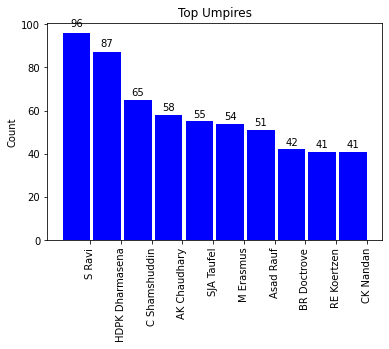

In [41]:
temp_df = pd.melt(match_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()

S Ravi, and Dharmsena are the top umpires chosen for IPL matches.

### toss & Winning Percentage
how lucky is the toss winner?

C:\Users\Anand\AppData\Local\Temp\ipykernel_8552\3878577665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df['toss_winner_is_winner'].loc[match_df.toss_winner == match_df.winner] = 'yes'


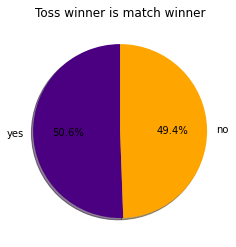

In [44]:
match_df['toss_winner_is_winner'] = 'no'
match_df['toss_winner_is_winner'].loc[match_df.toss_winner == match_df.winner] = 'yes'
temp_series = match_df.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['indigo', 'orange']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner")
plt.show()

Seems like our assumptions is wrong, toss winner is not the match winner. there is 50% prob of winning or loosing.

Let us also look at the team wise break up. If the team wins the toss, will it end up in the winning side.

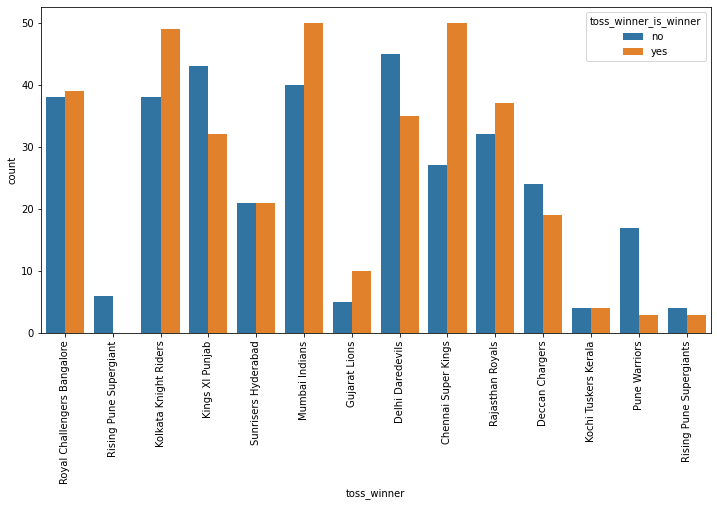

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

CSK,MI,KKR won the toss most of the time hence there prob or winning the match is high, wehere as if we seen DD, King XI punjab, Pune warriors losses the toss mostly hence, there winning percentage is lower.

Analysis with the delivery dataset.

In [46]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Batsman 
Analysis of batsman. 
Most number of IPL runs in IPL.

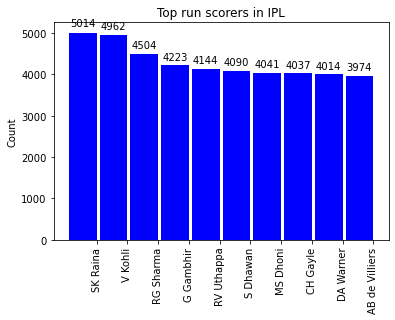

In [49]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
autolabel(rects)
plt.show()

SK Raina followed By Virat Kohli are among the top performers in terms of batting in IPL.

Players with more number of boundaries in IPL.

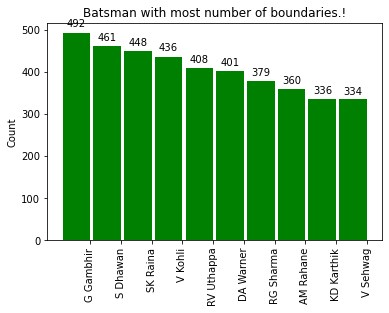

In [50]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!")
autolabel(rects)
plt.show()

Gambhir and S dhwan are the players who hit more boundries.

Now let's check who is the King of Sixes.

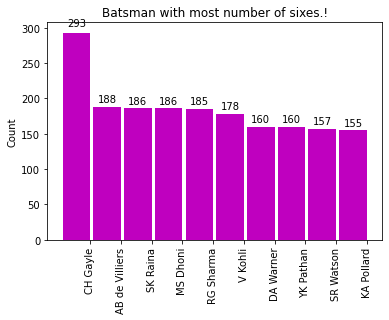

In [51]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
autolabel(rects)
plt.show()

#### Chris Gaylie is the palyer with most number of sixes 

batsman who has played the most number of dot balls.

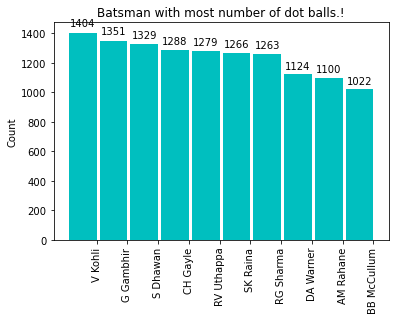

In [52]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
autolabel(rects)
plt.show()

#### Virat Kohli
played the most dot balls, it may be because he had played more number of matches that's why the trend is like that.
Let us check the percentage distribution now.

C:\Users\Anand\AppData\Local\Temp\ipykernel_8552\2224301507.py:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=False)


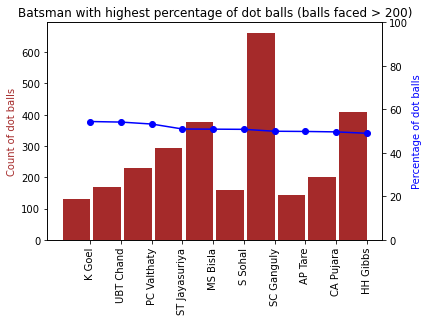

In [54]:
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = score_df.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

It is noteworthy that among batsmen with more than 200 balls faced, those with a higher percentage of dot balls (balls that are not hit for runs) stand out. It is interesting to observe that among these players, Sourav Ganguly stands out for facing more than 1000 balls and having a significant proportion of them be dot balls. It is surprising to see notable players like Sanath Jayasuriya and Herschelle Gibbs also appearing on this list.

### Bowlers
bowlers who has bowled most number of balls in IPL.

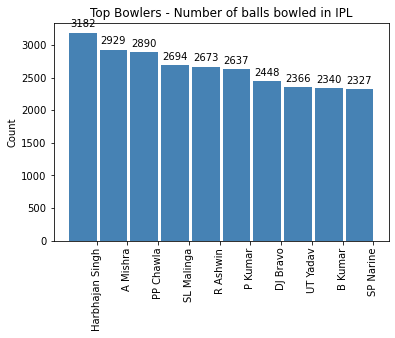

In [60]:
temp_df = score_df.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='steelblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
autolabel(rects)
plt.show()

Harbhajan Singh has delivered the most number of balls in IPL matches. Now, we will examine the bowler with the highest number of dot balls.

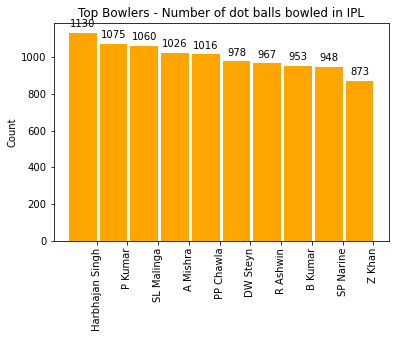

In [58]:
temp_df = score_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='orange')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
autolabel(rects)
plt.show()


Bowler who bowled more extra bowled

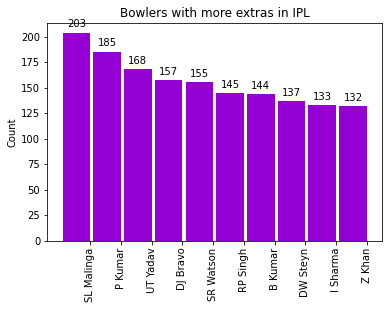

In [63]:
temp_df = score_df.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='darkviolet')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
autolabel(rects)
plt.show()

Malinga tops with 178 extra runs.

Most common dismissal type

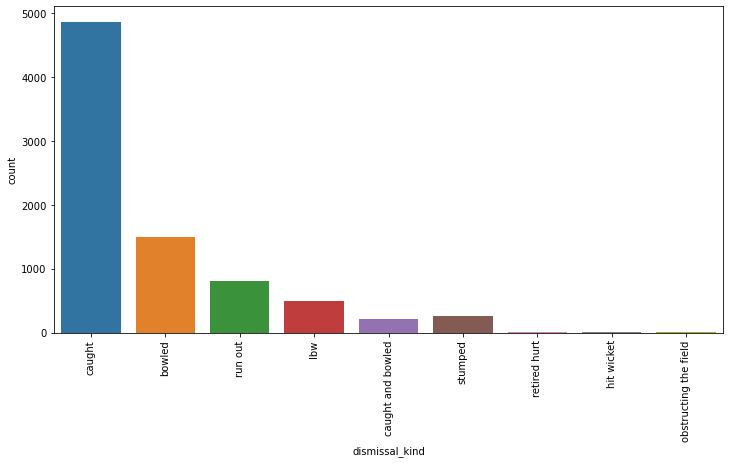

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()